In [23]:
import pandas as pd
data = pd.read_csv("updated-d-dos.csv")

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the Ratings column
data['Scaled_Ratings'] = scaler.fit_transform(data[['Ratings']])

# Display the updated dataset
data.tail()

,Name,Price,Features,Ratings,Sentiments,Scaled_Ratings
475,Hgworld Wireless Controller Compatible with Pl...,"₹1,264","Joystick Gamepad Motion Controller, Cameo Grey...",4.0,Positive,0.80
476,AMD Ryzen 5 8500G 3.5 GHz Upto 5 GHz AM5 Socke...,"₹14,759",Silver,4.6,Positive,0.92
477,AMD Ryzen 5 5600GT 3.6 GHz AM4 Socket 6 Cores ...,"₹12,959",Silver,4.5,Positive,0.90
478,ZORI Panda Animal Music Headphone Pattern Prin...,₹151,Headphone Pattern,4.5,Positive,0.90
479,AtoZsports SUP VIDEO GAME HAND CONSOLE Handhel...,₹542,Any,3.5,Negative,0.70


In [27]:
from sklearn.cluster import KMeans

K = range(1, 11)
distortions = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Scaled_Ratings']])
    distortions.append(kmeans.inertia_)

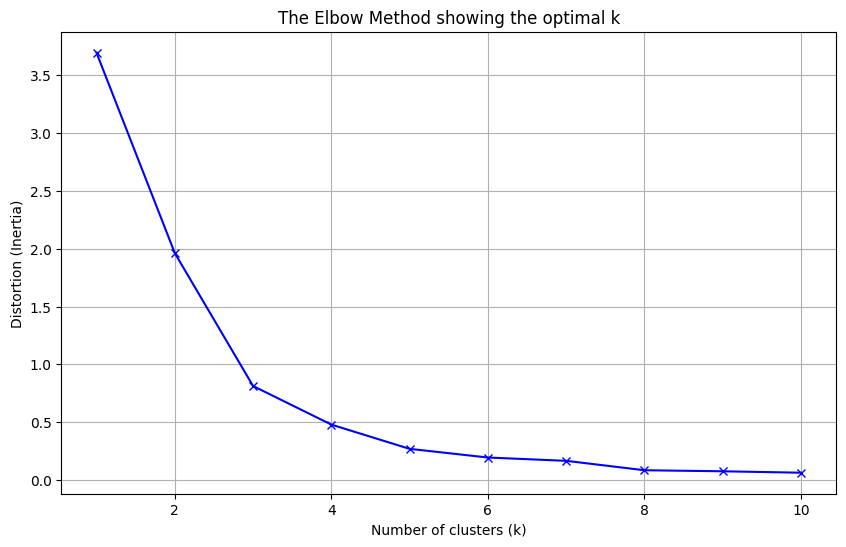

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

In [31]:
optimal_k = 3

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the Scaled_Ratings and predict cluster labels
data['Cluster'] = kmeans.fit_predict(data[['Scaled_Ratings']])

# Display the dataset with the assigned clusters
data

,Name,Price,Features,Ratings,Sentiments,Scaled_Ratings,Cluster
0,Acer Nitro V AMD Ryzen 5 Hexa Core 7535HS - (1...,"₹56,990","15.6 Inch, Obsidian Black, 2.1 Kg",4.3,Positive,0.86,1
1,ASUS TUF Gaming A15 AMD Ryzen 5 Hexa Core 7535...,"₹55,990","15.6 Inch, Graphite Black, 2.30 Kg",4.4,Positive,0.88,1
2,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,"₹53,990","15.6 Inch, Black, 1.99 Kg",4.3,Positive,0.86,1
3,HP Victus Intel Core i5 12th Gen - (16 GB/512 ...,"₹60,990","15.6 inch, Performance Blue",4.4,Positive,0.88,1
4,HP Victus Intel Core i5 12th Gen 12450H - (8 G...,"₹57,990","15.6 inch, Performance Blue, 2.3 Kg",4.4,Positive,0.88,1
...,...,...,...,...,...,...,...
475,Hgworld Wireless Controller Compatible with Pl...,"₹1,264","Joystick Gamepad Motion Controller, Cameo Grey...",4.0,Positive,0.80,0
476,AMD Ryzen 5 8500G 3.5 GHz Upto 5 GHz AM5 Socke...,"₹14,759",Silver,4.6,Positive,0.92,1
477,AMD Ryzen 5 5600GT 3.6 GHz AM4 Socket 6 Cores ...,"₹12,959",Silver,4.5,Positive,0.90,1
478,ZORI Panda Animal Music Headphone Pattern Prin...,₹151,Headphone Pattern,4.5,Positive,0.90,1


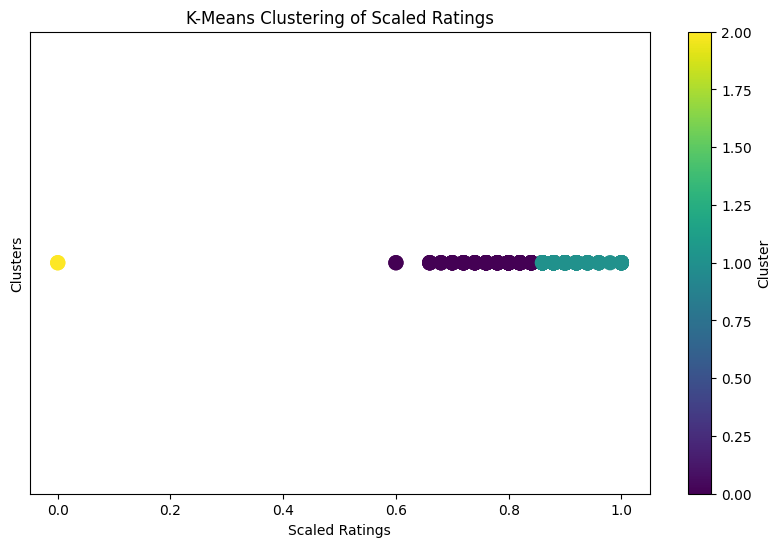

In [34]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(data['Scaled_Ratings'], [0] * len(data), c=data['Cluster'], cmap='viridis', s=100)

# Add titles and labels
plt.title('K-Means Clustering of Scaled Ratings')
plt.xlabel('Scaled Ratings')
plt.ylabel('Clusters')
plt.yticks([])  # Hide y-axis ticks since we only have one feature

# Show color bar for cluster representation
plt.colorbar(label='Cluster')

# Display the plot
plt.show()

In [35]:
data.to_csv('sentiment-data-with-cluster.csv', index=False)

In [38]:
import  joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
df = pd.read_csv('sentiment-data-with-cluster.csv')
df

,Name,Price,Features,Ratings,Sentiments,Scaled_Ratings,Cluster
0,Acer Nitro V AMD Ryzen 5 Hexa Core 7535HS - (1...,"₹56,990","15.6 Inch, Obsidian Black, 2.1 Kg",4.3,Positive,0.86,1
1,ASUS TUF Gaming A15 AMD Ryzen 5 Hexa Core 7535...,"₹55,990","15.6 Inch, Graphite Black, 2.30 Kg",4.4,Positive,0.88,1
2,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,"₹53,990","15.6 Inch, Black, 1.99 Kg",4.3,Positive,0.86,1
3,HP Victus Intel Core i5 12th Gen - (16 GB/512 ...,"₹60,990","15.6 inch, Performance Blue",4.4,Positive,0.88,1
4,HP Victus Intel Core i5 12th Gen 12450H - (8 G...,"₹57,990","15.6 inch, Performance Blue, 2.3 Kg",4.4,Positive,0.88,1
...,...,...,...,...,...,...,...
475,Hgworld Wireless Controller Compatible with Pl...,"₹1,264","Joystick Gamepad Motion Controller, Cameo Grey...",4.0,Positive,0.80,0
476,AMD Ryzen 5 8500G 3.5 GHz Upto 5 GHz AM5 Socke...,"₹14,759",Silver,4.6,Positive,0.92,1
477,AMD Ryzen 5 5600GT 3.6 GHz AM4 Socket 6 Cores ...,"₹12,959",Silver,4.5,Positive,0.90,1
478,ZORI Panda Animal Music Headphone Pattern Prin...,₹151,Headphone Pattern,4.5,Positive,0.90,1


In [43]:
x = data[['Ratings']]
y = data[['Ratings']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# Measure how well the model predicts sales using standard metrics.
y_pred = model.predict(x_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 4.1666666671195486e-05
Mean Squared Error: 1.0416666666665298e-07
Root Mean Squared Error: 0.0003227486121839302
R² Score: 0.9999988708937582


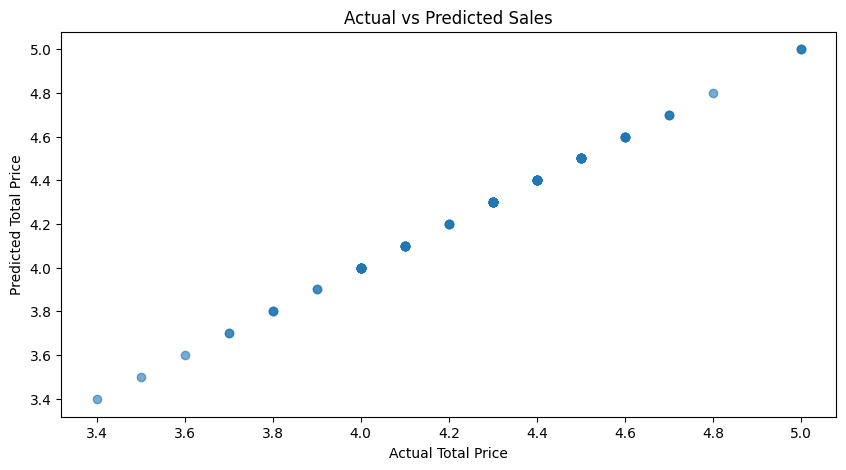

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Total Price")
plt.ylabel("Predicted Total Price")
plt.title("Actual vs Predicted Sales")
plt.show()


In [50]:
joblib.dump(model, "sentiment_prediction_model.pkl")

['sentiment_prediction_model.pkl']